In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
% matplotlib inline

In [2]:
flight = pd.read_csv('flight_data_cleaned.csv')
#flight = pd.read_csv('D:/Downloads/attachment_python_basics/attachment_attachment_Projects/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/flight_data.tsv', sep = '\t')

In [3]:
flight.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Calculating and Pivoting the data for the Heat Map 

In [15]:
flight['Flights'] =1                                          #initially, set that counter to 1.
group_data = flight.groupby(['month','day'])['Flights'].sum() #sum function
#pivot_table= group_data.pivot('month', 'day')['Flights']
group_data=group_data.to_frame()
group_data

Flights
month day         
1     1        842
      2        943
      3        914
      4        915
      5        720
      6        832
      7        933
      8        899
      9        902
      10       932
      11       930
      12       690
      13       828
      14       928
      15       894
      16       901
      17       927
      18       924
      19       674
      20       786
      21       912
      22       890
      23       897
      24       925
      25       922
      26       680
      27       823
      28       923
      29       890
      30       900
...            ...
12    2       1004
      3        973
      4        958
      5        969
      6        970
      7        691
      8        875
      9        962
      10       943
      11       954
      12       968
      13       970
      14       692
      15       880
      16       964
      17       949
      18       956
      19       974
      20       980
      21       811
      22       895
      23       985
      24       761
      25       719
      26       936
      27       963
      28       814
      29       888
      30       968
      31       776

[365 rows x 1 columns]

# 1. Flights traffic during various months in the year 2013 

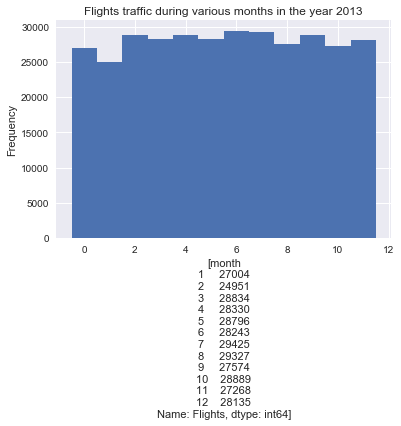

In [91]:
flight_month= flight.groupby("month").Flights.sum()               # flight_month depicts Flights traffic during various months in the year 2013
flight_month

indexes=np.arange(len(flight_month))
width=1

plt.bar(indexes, flight_month, width)                             # Plotting Flights traffic during various months in the year 2013
plt.xlabel([flight_month])
plt.ylabel('Frequency')
plt.title('Flights traffic during various months in the year 2013')
plt.show()

## [Sid #1]: Find monthly dep_delay & traffic for each airport


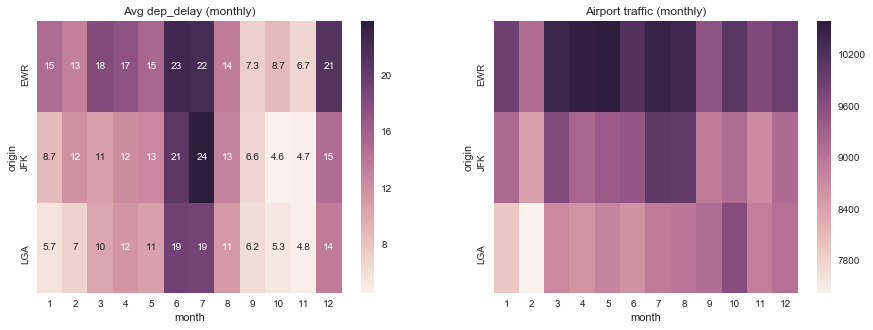

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

avg_dep_delays = flight.pivot_table(index="origin", columns="month", values="dep_delay")
sns.heatmap( avg_dep_delays, annot=True )
plt.title("Avg dep_delay (monthly)");

#monthly traffic
monthly_traffic = flight.pivot_table(index="origin", columns="month", values="dep_delay", aggfunc=np.size)
plt.subplot(1,2,2)
sns.heatmap( monthly_traffic )
plt.title("Airport traffic (monthly)");
# So LGA is having least load

# 2. Calculating the Flight Delay Profile departing from NYC

In [12]:
p_delay=flight[flight.dep_delay > 0]      # p_delay depicts the delayed departure
print(len(p_delay))

o_delay=flight[flight.dep_delay == 0]     # o_delay depicts the on-time departure
print(len(o_delay))

n_delay=flight[flight.dep_delay < 0]      # n_delay depicts the early departure
print(len(n_delay))

136684
16514
183578


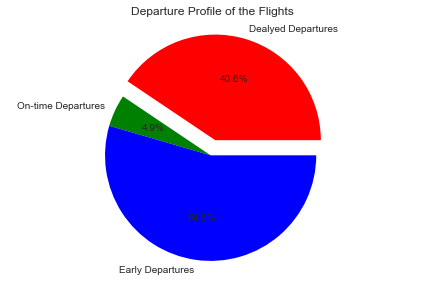

In [13]:
prop=[len(p_delay), len(o_delay), len(n_delay)]                          # prop is to calculate the proportions
plt.pie(prop,
       labels=['Dealyed Departures','On-time Departures','Early Departures'],
       shadow=False,
       colors=['Red','Green','Blue'],
       explode= (0.15, 0, 0),
       startangle=0,
       autopct='%1.1f%%'
       )
plt.axis('equal')
plt.title("Departure Profile of the Flights")
plt.tight_layout()
plt.show()

# 3. Heat Map for the flights delayed in days Vs months

In [16]:
p_delay
group_data_dm = p_delay.groupby(['month','day'])['Flights'].sum()     # group_data_dm defines group data of days vs months
group_data_dm = group_data_dm.to_frame()
group_data_dm

KeyError: 'Column not found: Flights'

AttributeError: Unknown property index

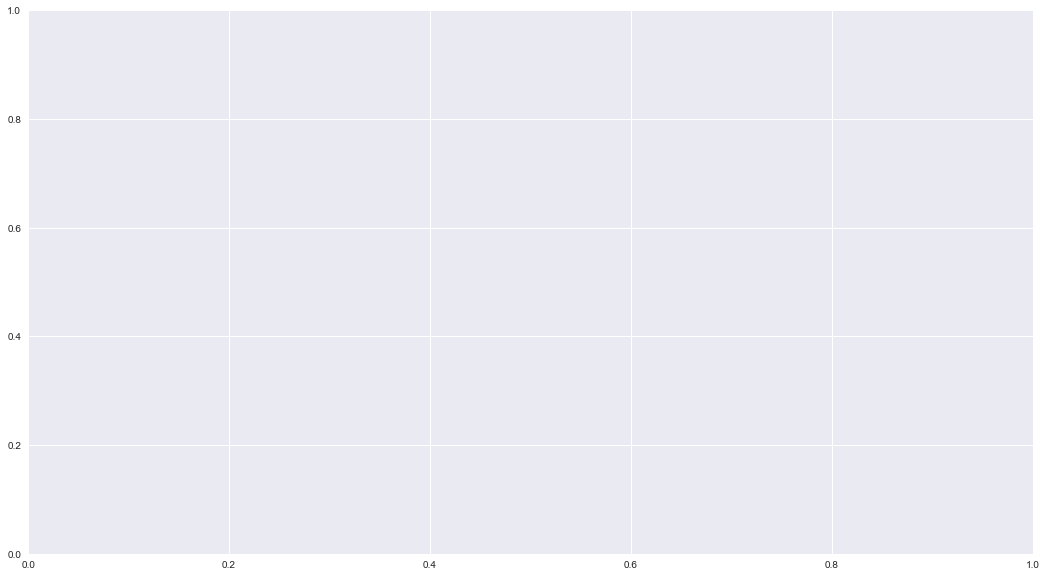

In [9]:
plt.figure(figsize=[18,10])
sns.heatmap(group_data_dm, index="month", columns="day", values="carrier" )
plt.title("Count of flights (day-wise)")

## [Sid #2] Trying above required heat map:

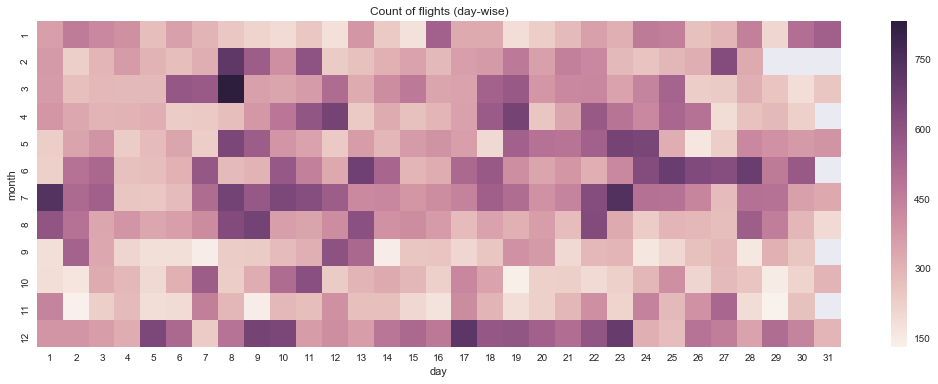

In [21]:
plt.figure(figsize=(18,6))
sns.heatmap( p_delay.pivot_table(index="month", columns="day", values="year", aggfunc=np.size) );
plt.title("Count of flights (day-wise)");

# 4. Which carrier delays the most/ least in the year 2013?

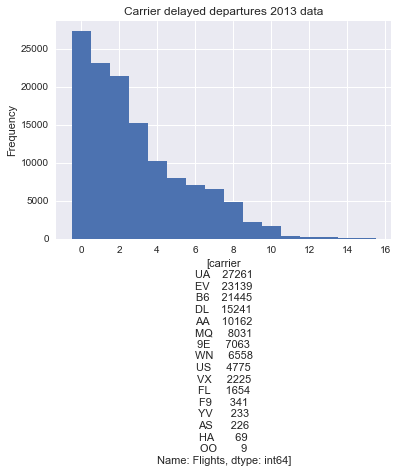

In [10]:
carrier_p=p_delay.groupby("carrier").Flights.sum()             # carrier_p depicts the carrier delayed in the dataset
carrier_p=carrier_p.sort_values(ascending = False)
carrier_p

indexes=np.arange(len(carrier_p))
width=1

plt.bar(indexes, carrier_p, width)                             # Plotting the bar graph for the Carrier in the year 2013
plt.xlabel([carrier_p])
plt.ylabel('Frequency')
plt.title('Carrier delayed departures 2013 data')
plt.show()

## [Sid #3] An easy way
Count of delays by each carrier.

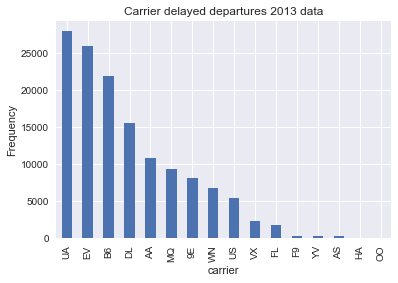

In [61]:
carrier_delay_count = p_delay.groupby("carrier")["year"].size()        #year is just a place holder. Any column is just fine.
carrier_delay_count.sort_values(ascending=False).plot(kind="bar",)
plt.ylabel('Frequency')
plt.title('Carrier delayed departures 2013 data');

# 4.1. Average delay by the carrier in the year 2013.

In [43]:
carrier_p_avg=round(p_delay.groupby("carrier").dep_delay.mean(), 2)   # carrier _p_avg depicts the average delay by the carrier company
carrier_p_avg=carrier_p_avg.sort_values(ascending = False)
print(carrier_p_avg)

carrier
OO    58.00
YV    52.95
EV    50.33
9E    48.92
F9    45.14
MQ    44.92
HA    44.84
FL    40.83
B6    39.79
DL    37.40
AA    37.17
WN    34.86
VX    34.45
US    33.05
AS    31.34
UA    29.93
Name: dep_delay, dtype: float64


# 5. Which Flight delays the most/least in the year 2013?

In [44]:
'''#flight_name=p_delay([])
flight_p=p_delay.groupby("flight").Flights.sum()
flight_p=flight_p.sort_values(ascending = False)
flight_p
indexes=np.arange(len(flight_p))
width=1
plt.bar(indexes, flight_p, width)
plt.xlabel([flight_p])
plt.ylabel('Frequency')
plt.title('Flight delayed departures 2013 data')
plt.show()'''

'#flight_name=p_delay([])\nflight_p=p_delay.groupby("flight").Flights.sum()\nflight_p=flight_p.sort_values(ascending = False)\nflight_p\nindexes=np.arange(len(flight_p))\nwidth=1\nplt.bar(indexes, flight_p, width)\nplt.xlabel([flight_p])\nplt.ylabel(\'Frequency\')\nplt.title(\'Flight delayed departures 2013 data\')\nplt.show()'

# 5.1. Average delay by the flight in the year 2013

In [45]:
'''flight_p_avg=round(p_delay.groupby("flight").dep_delay.mean(), 2)
flight_p_avg=flight_p_avg.sort_values(ascending = False)
print(flight_p_avg)'''

'flight_p_avg=round(p_delay.groupby("flight").dep_delay.mean(), 2)\nflight_p_avg=flight_p_avg.sort_values(ascending = False)\nprint(flight_p_avg)'

In [46]:
'''#p_delay= p_delay.fillna('')
#p_delay['Flight_Name'] = np_concat(p_delay['carrier'], p_delay['flight'])
p_delay['C'] = p_delay.apply(lambda row: row['carrier'] + row['flight'])
p_delay'''

"#p_delay= p_delay.fillna('')\n#p_delay['Flight_Name'] = np_concat(p_delay['carrier'], p_delay['flight'])\np_delay['C'] = p_delay.apply(lambda row: row['carrier'] + row['flight'])\np_delay"

# 6. Origin-wise Flight Delay

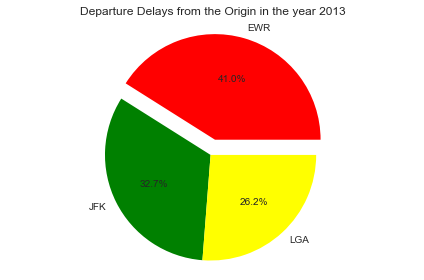

In [11]:
ewr=(p_delay['origin']=='EWR').sum()        # ewr for the origin-EWR 
jfk=(p_delay['origin']=='JFK').sum()        # jfk for the origin-JFK
lga=(p_delay['origin']=='LGA').sum()        # lga for the origin-LGA
prop=[ewr, jfk, lga]
plt.pie(prop,
       labels=['EWR','JFK','LGA'],
       shadow=False,
       colors=['Red','Green','Yellow'],
       explode= (0.15, 0, 0),
       startangle=0,
       autopct='%1.1f%%'
       )
plt.axis('equal')
plt.title("Departure Delays from the Origin in the year 2013")
plt.tight_layout()
plt.show()

# 7. Destination wise Delay Data

In [42]:
dest_p=p_delay.groupby('dest').Flights.sum()
len(dest_p)

103

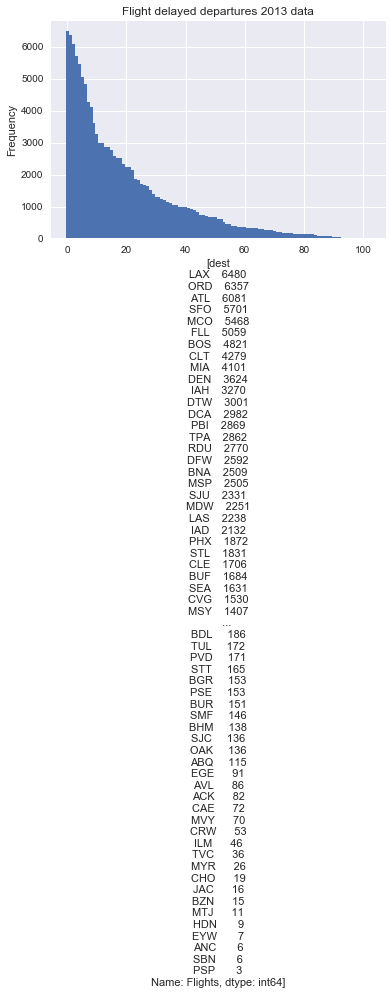

In [46]:
p_dest=p_delay.groupby("dest").Flights.sum()          # p_dest depicts the dataframe grouped by the destination-wise delayed departures
p_dest=p_dest.sort_values(ascending = False)          # Sorting it in descending order
p_dest
indexes=np.arange(len(p_dest))
width=1
plt.bar(indexes, p_dest, width)
plt.xlabel([p_dest])
plt.ylabel('Frequency')
plt.title('Flight delayed departures 2013 data')
plt.show()

# 8. Which time of the year does the flights delay the departure?

In [12]:
month= p_delay.groupby('month').Flights.sum()
month

month
1      9662
2      9124
3     11209
4     10543
5     11291
6     12655
7     13909
8     11713
9      7815
10     8722
11     8239
12    13550
Name: Flights, dtype: int64

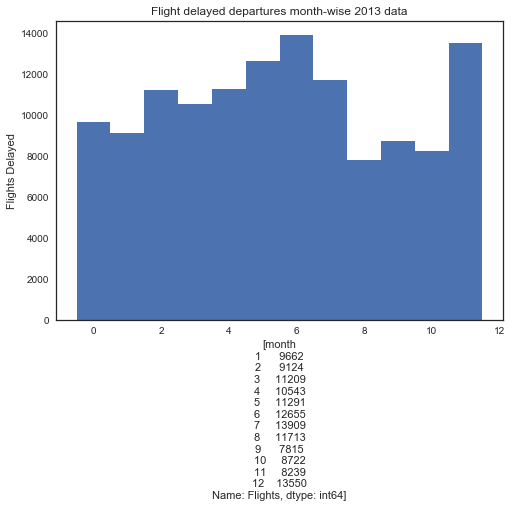

In [121]:
month=p_delay.groupby("month").Flights.sum()
#p_dest=p_dest.sort_values(ascending = False)
month
indexes=np.arange(len(month))
width=1
plt.bar(indexes, month, width)
plt.xlabel([month])
plt.ylabel('Flights Delayed')
plt.title('Flight delayed departures month-wise 2013 data')
plt.show()

# 9. Heat map: Carrier Vs Month for the flight delay

In [7]:
p_delay['Flights'] =1                                          #initially, set that counter to 1.
group_data = p_delay.groupby(['month','carrier'])['Flights'].sum() #sum function
#pd.pivot_table(group_data, values='Flights', index=['month'], columns=['day'])
group_data=group_data.to_frame()
group_data

NameError: name 'p_delay' is not defined

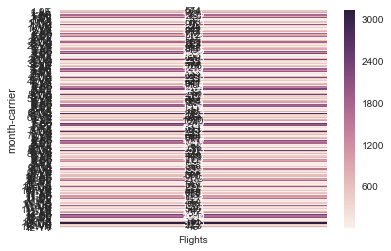

In [7]:
plt.figure(figsize=[18,5])
sns.heatmap( flight.pivot_table(index="month", columns="day", values="carrier", aggfunc=np.size) )
plt.title("Count of flights (day-wise)");

# 10. Heat Map: Origin Vs Month Flight delay

In [67]:
p_delay['Flights'] =1                                          #initially, set that counter to 1.
group_data = p_delay.groupby(['month','origin'])['Flights'].sum() #sum function
#pd.pivot_table(group_data, values='Flights', index=['month'], columns=['day'])
group_data=group_data.to_frame()
group_data

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Flights
month origin         
1     EWR        4613
      JFK        3194
      LGA        2376
2     EWR        4268
      JFK        3523
      LGA        2594
3     EWR        5201
      JFK        3718
      LGA        3151
4     EWR        4805
      JFK        3490
      LGA        2916
5     EWR        5175
      JFK        3661
      LGA        3018
6     EWR        5385
      JFK        4572
      LGA        3707
7     EWR        5604
      JFK        5256
      LGA        3989
8     EWR        4686
      JFK        4222
      LGA        3291
9     EWR        3093
      JFK        2741
      LGA        2430
10    EWR        3631
      JFK        2607
      LGA        2720
11    EWR        3462
      JFK        2423
      LGA        2587
12    EWR        6027
      JFK        4487
      LGA        4061

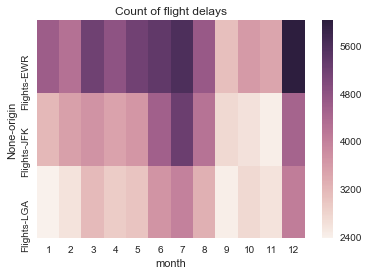

In [71]:
sns.heatmap(group_data.unstack().T)
plt.title("Count of flight delays");

# 11. Heat map: Origin Vs Carrier Flight delay 

In [72]:
p_delay['Flights'] =1                                          #initially, set that counter to 1.
group_data = p_delay.groupby(['origin','carrier'])['Flights'].sum() #sum function
#pd.pivot_table(group_data, values='Flights', index=['month'], columns=['day'])
group_data=group_data.to_frame()
group_data

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Flights
origin carrier         
EWR    9E           335
       AA          1067
       AS           228
       B6          2350
       DL          1352
       EV         21445
       MQ           992
       OO             3
       UA         23157
       US          1075
       VX           555
       WN          3391
JFK    9E          6883
       AA          5167
       B6         17185
       DL          7035
       EV           599
       HA            69
       MQ          2757
       UA          1528
       US           970
       VX          1701
LGA    9E           889
       AA          4564
       B6          2376
       DL          7203
       EV          3912
       F9           344
       FL          1727
       MQ          5516
       OO             6
       UA          3262
       US          3393
       WN          3359
       YV           289

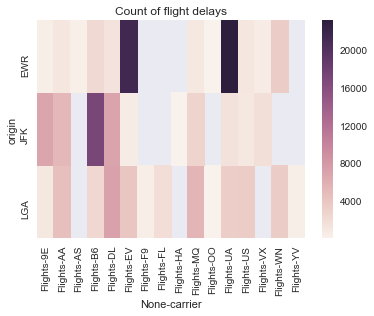

In [74]:
sns.heatmap(group_data.unstack())
plt.title("Count of flight delays");

## [Sid] What an insight above :-)
EV & UA get maximum delays AND only from EWR airport. <br>
Moreover the airport EWR is very favourable rest all carriers.

Second Next higher delays are observed by carrier B6 @JFK-airport

# 12. Which time of the day does flights delay from the origin in year 2013?

In [77]:
labels = ['0-60', '100-160', '200-260', '300-360', '400-460', '500-560', '600-660', '700-760', '800-860','900-960', '1000-1060',
         '1100-1160', '1200-1260', '1300-1360', '1400-1460', '1500-1560', '1600-1660', '1700-1760', '1800-1860', '1900-1960',
         '2000-2060', '2100-2160', '2200-2260', '2300-2360']
p_delay['time_slab'] = pd.cut(p_delay.sched_dep_time, range(0, 2500, 100), right=False, labels=labels)
p_delay.groupby('time_slab').agg({'sched_dep_time': [np.size]})

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,sched_dep_time
,size
time_slab,
0-60,0
100-160,1
200-260,0
300-360,0
400-460,0
500-560,498
600-660,5855
700-760,5252


In [78]:
group_data_p = p_delay.groupby(['time_slab','origin'])['Flights'].sum()
group_data_p=group_data_p.to_frame()
group_data_p

Flights
time_slab origin         
100-160   EWR           1
500-560   EWR         229
          JFK         172
          LGA          97
600-660   EWR        2982
          JFK        1270
          LGA        1603
700-760   EWR        2539
          JFK        1505
          LGA        1208
800-860   EWR        3007
          JFK        2678
          LGA        1547
900-960   EWR        1945
          JFK        1905
          LGA        1869
1000-1060 EWR        2264
          JFK        1417
          LGA        1551
1100-1160 EWR        1756
          JFK         867
          LGA        2707
1200-1260 EWR        3174
          JFK        1645
          LGA        1977
1300-1360 EWR        4384
          JFK        1650
          LGA        2578
1400-1460 EWR        3942
          JFK        3219
          LGA        2662
1500-1560 EWR        5077
          JFK        4032
          LGA        2925
1600-1660 EWR        4291
          JFK        4202
          LGA        3046
1700-1760 EWR        5295
          JFK        4046
          LGA        3451
1800-1860 EWR        4215
          JFK        3857
          LGA        3187
1900-1960 EWR        3806
          JFK        4657
          LGA        3237
2000-2060 EWR        4333
          JFK        3235
          LGA        1701
2100-2160 EWR        2654
          JFK        1985
          LGA        1366
2200-2260 EWR          43
          JFK        1091
          LGA         128
2300-2360 EWR          13
          JFK         461

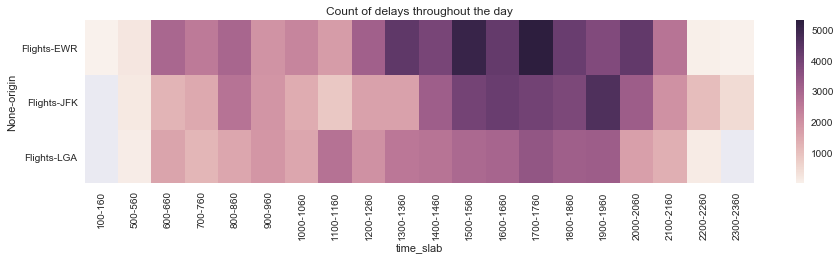

In [85]:
plt.figure(figsize=(15,3))
sns.heatmap(group_data_p.unstack().T )
plt.title("Count of delays throughout the day");

# 13. Which time of the day does the carrier departure delays?

In [86]:
group_data_c = p_delay.groupby(['time_slab','carrier'])['Flights'].sum()
group_data_c=group_data_c.to_frame()
group_data_c

Flights
time_slab carrier         
100-160   US             1
500-560   AA            95
          B6            72
          EV            15
          UA           282
          US            34
600-660   9E            48
          AA           409
          B6           860
          DL           293
          EV          1226
          FL           127
          MQ           199
          UA          1689
          US           403
          WN           600
          YV             1
700-760   9E           155
          AA           575
          AS            75
          B6           767
          DL           505
          EV           734
          FL            14
          MQ           192
          UA          1391
          US           120
          VX           244
          WN           480
800-860   9E           813
...                    ...
1900-1960 YV             6
2000-2060 9E           683
          AA           210
          B6          2011
          DL           431
          EV          2052
          FL           189
          MQ           449
          UA          2429
          US           220
          VX           210
          WN           382
          YV             3
2100-2160 9E            52
          AA           225
          B6          1967
          DL           443
          EV          1700
          MQ           645
          UA           741
          US           205
          WN            27
2200-2260 9E            13
          B6          1091
          DL            16
          EV           134
          UA             8
2300-2360 B6           466
          DL             2
          UA             6

[205 rows x 1 columns]

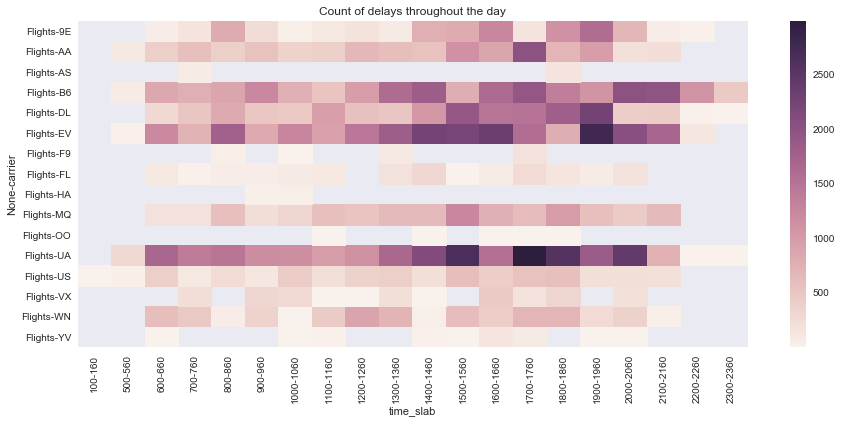

In [89]:
plt.figure(figsize=(15,6))
sns.heatmap(group_data_c.unstack().T )
plt.title("Count of delays throughout the day");

In [92]:
# Delay Percent month-wise
print(flight_month)
print(month)
per_month= pd.concat([flight_month, month], axis=1)
per_month

month
1     27004
2     24951
3     28834
4     28330
5     28796
6     28243
7     29425
8     29327
9     27574
10    28889
11    27268
12    28135
Name: Flights, dtype: int64


NameError: name 'month' is not defined

In [24]:
col_month= list(per_month.columns)
col_month[-1]='Flights Delayed'
col_month

['Flights', 'Flights Delayed']

In [25]:
per_month.columns = per_month.columns[:-1].tolist() + ['Flights Delayed']
per_month 

,Flights,Flights Delayed
month,,
1,27004,9662
2,24951,9124
3,28834,11209
4,28330,10543
5,28796,11291
6,28243,12655
7,29425,13909
8,29327,11713
9,27574,7815


In [20]:
# Percentage of flights delayed in various months in year 2013
per_month['Percent Flight Delay / Month']= per_month['Flights Delayed']/per_month['Flights']*100
round(per_month, 2)

,Flights,Flights Delayed,Percent Flight Delay / Month
month,,,
1,27004,9662,35.78
2,24951,9124,36.57
3,28834,11209,38.87
4,28330,10543,37.21
5,28796,11291,39.21
6,28243,12655,44.81
7,29425,13909,47.27
8,29327,11713,39.94
9,27574,7815,28.34


In [104]:
# Delay month-wise in various Airports
delay_count =   p_delay.pivot_table(index="origin", columns="month", values="year", aggfunc=np.size) 
tot_dely_count = flight.pivot_table(index="origin", columns="month", values="year", aggfunc=np.size)
perc_delay = delay_count/tot_dely_count
perc_delay

month,1,2,3,4,5,6,7,8,9,10,11,12
origin,,,,,,,,,,,,
EWR,0.466289,0.468650,0.499136,0.456272,0.488576,0.529238,0.534988,0.452360,0.323874,0.359363,0.356650,0.607438
JFK,0.348652,0.418359,0.383418,0.378607,0.389592,0.482686,0.524394,0.422919,0.307701,0.285136,0.278186,0.490597
LGA,0.298868,0.349454,0.361478,0.339821,0.342682,0.431247,0.446847,0.366277,0.266564,0.282099,0.292283,0.447888
